# 2010 Baja CA EQ, QTM Catalog Mapping: Density Grids



In [110]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported! " + str(time))

Imported! <module 'time' (built-in)>


In [111]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range

Wall time: 843 ms


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09,-30.0,-720.0
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09,-30.0,-720.0
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09,-30.0,-720.0
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09,-30.0,-719.0
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.290,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.670,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


In [112]:
# Set mean latitudes and longitudes
MeanLat = QTM_Range["LATITUDE"].mean()
MeanLon = QTM_Range["LONGITUDE"].mean() 

# Define two more datasets of 30 days before and 30 days after Baja EQ
QTM_TEMP = QTM_Range.loc[QTM_Range["EVENTID"] == ""] # Get Baja EQ
QTM_TEMP = QTM_TEMP.iloc[0]
BajaTimestamp = float(QTM_TEMP["TIMESTAMP"])
BajaTimestamp

1270420842.0

In [113]:
QTM_Range_BEFORE = QTM_Range.loc[QTM_Range["TIMESTAMP"] <= BajaTimestamp]
QTM_Range_AFTER = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]

QTM_Range_BEFORE.describe()
QTM_Range_AFTER

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356880,2010,4,4,22,40,42.16,14607652,32.27350,-115.29400,13.990,...,14607652,1.0,0.01,0,2010-04-04T22:40:42.160000Z,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,0.0,0.0
356881,2010,4,4,22,41,45.87,347184,34.43929,-116.93557,-0.583,...,9807541,0.264,0.026,0,2010-04-04T22:41:45.870000Z,1.270421e+09,2010-04-04T22:41:45.869999Z,1.270421e+09,0.0,0.0
356882,2010,4,4,22,41,54.35,347185,33.16622,-115.59365,4.499,...,10531677,0.163,0.017,0,2010-04-04T22:41:54.350000Z,1.270421e+09,2010-04-04T22:41:54.350000Z,1.270421e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.33,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.29,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.62,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.67,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


In [114]:
# This entire cell was taken from the lecture notes; code was found online on github
# Needed for tick labels, since cartopy doesn't support tick labels in Lambert projections
import shapely.geometry as sgeom
from copy import copy
def find_side(ls, side):
    """
    Given a shapely LineString which is assumed to be rectangular, return the
    line corresponding to a given side of the rectangle.
    
    """
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])


def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])
    

def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])

def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:    
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels

In [115]:
QTM_Range["LONGITUDE"].values[0]
len(QTM_Range)
QTM_Range["LONGITUDE"].values

Faults = pd.read_csv("cafaults.xy", sep = "[\s]", names = ["LONGITUDE", "LATITUDE"])
# Read in fault traces
Faults
#Faults.describe()
#print(Faults.LATITUDE)
#Faults["LONGITUDE"].astype(float)
#Faults = Faults.loc[Faults["LONGITUDE"] == float]
#Faults.columns = ["LONGITUDE", "LATITUDE"]
#Faults
#Faults.LONGITUDE.astype(float)

FaultsIndices = list(Faults.loc[Faults["LONGITUDE"] == ">"].index)
FaultsIndices

[0,
 137,
 245,
 1115,
 1191,
 1275,
 1296,
 1319,
 1432,
 1524,
 1548,
 1599,
 1650,
 1887,
 1958,
 2011,
 2116,
 2122,
 2126,
 2205,
 2295,
 2618,
 2641,
 2708,
 2756,
 2841,
 2933,
 2949,
 2986,
 3714,
 3730,
 3739,
 3876,
 13125,
 13465,
 13561]

Wall time: 4.47 s


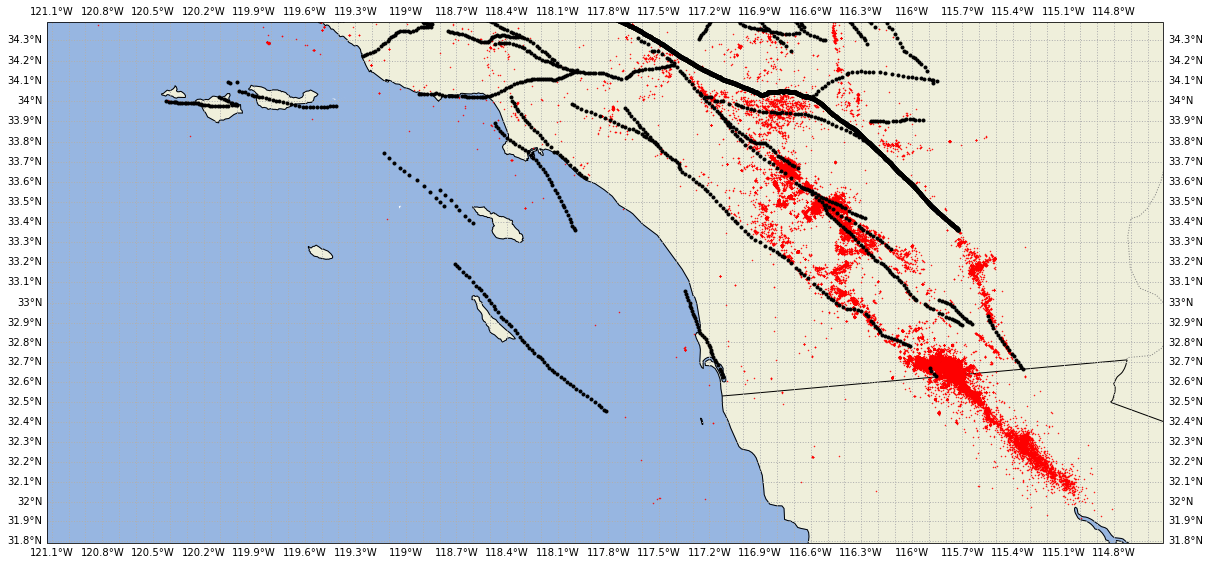

In [116]:
%%time
# Mapping: 60 days (Mercator instead of Lambert Conformal projection?)

proj = ccrs.Mercator(central_longitude = MeanLon, min_latitude = MeanLat-1.5, max_latitude = MeanLat+1.5, globe = None )
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
#ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
g1=ax.gridlines(crs = ccrs.PlateCarree(), linewidth = 1, linestyle = "dotted", draw_labels = True)
# Added latitude, longitude grid lines
g1.ylocator = mticker.FixedLocator(np.arange(-90,91,0.1))
g1.xlocator = mticker.FixedLocator(np.arange(-180,181,0.1))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
# ***GRIDLINES AND LABELS BLOCK***

ax.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 1, linestyle = "None");
# Plot fault traces! For loop through each fault

for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot


plt.savefig("Maps/Density Grid/EQMap_Full_Mercator.png", facecolor = "white");

Wall time: 4.22 s


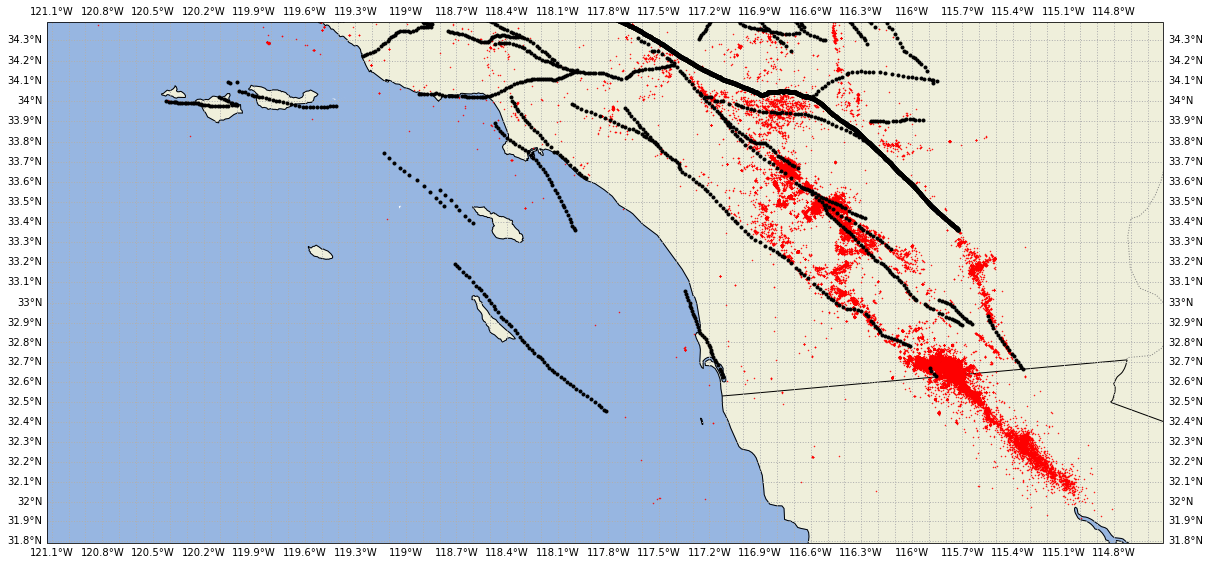

In [117]:
%%time
# Mapping: 60 days density 

proj = ccrs.Mercator(central_longitude = MeanLon, min_latitude = MeanLat-1.5, max_latitude = MeanLat+1.5, globe = None )
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
#ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
g1=ax.gridlines(crs = ccrs.PlateCarree(), linewidth = 1, linestyle = "dotted", draw_labels = True)
# Added latitude, longitude grid lines
g1.ylocator = mticker.FixedLocator(np.arange(-90,91,0.1))
g1.xlocator = mticker.FixedLocator(np.arange(-180,181,0.1))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
# ***GRIDLINES AND LABELS BLOCK***

ax.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 1, linestyle = "None");
# Plot fault traces! For loop through each fault

for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot


plt.savefig("Maps/Density Grid/EQMap_Full_Mercator_Density.png", facecolor = "white");

## EQ Density Grid

In [118]:
MeanLat
MeanLon
MeanLatR = round(MeanLat, 1)
MeanLatR
MeanLonR = round(MeanLon, 1)
MeanLonR

-116.0

In [119]:
%%time
# Mapping: Create density grid
# Edited 2/8
GridPoints = pd.DataFrame()

GPLat = pd.Series(name = "LATITUDE")
GPLon = pd.Series(name = "LONGITUDE")
# Define grid 2 degrees NSEW:
# Want lats to repeat for each possible lon, then next lat
for i in np.arange(MeanLatR-2, MeanLatR+2, step = 0.1): # Step through each latitude
    #print(i)
    Temp = pd.Series(i)
    #Temp = i
    GPLat = GPLat.append(pd.concat([Temp]*40)) # Concat 40 times; once for each longitude possible
    
GPLat.reset_index(inplace = True, drop = True) # Reset GPLat indices

Temp = pd.Series(np.arange(MeanLonR-2, MeanLonR+2, step = 0.1)) # Make a temporary lons series
GPLon = pd.concat([Temp]*40) # 40 values * 40 = 1600 values; concat 40 times
GPLon.reset_index(inplace = True, drop = True) # Reset GPLon indices

GridPoints = pd.concat([GPLat, GPLon], axis = 1, ignore_index = True) # Concat two series together
GridPoints # Have lat/lon grid!
#GridPoints = GridPoints.round(1) # Tried rounding; didn't work

GridPoints.columns = ["LATITUDE", "LONGITUDE"]
GridPoints.to_csv("Maps/Density Grid/GridPoints.csv")

Wall time: 47.9 ms


## Mercator and PlateCarree Projections: Test

Wall time: 4.39 s


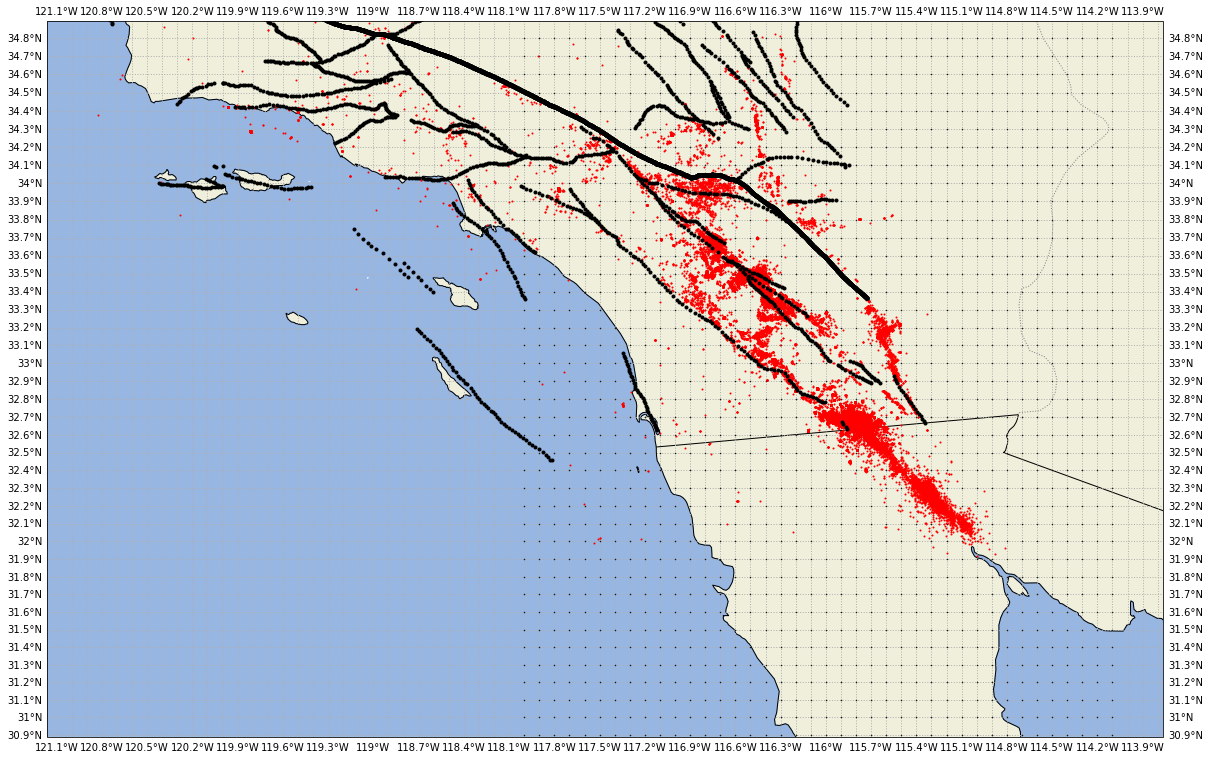

In [120]:
%%time
# Mapping: 60 days density grid

proj = ccrs.Mercator(min_latitude = MeanLat-2, 
                     max_latitude = MeanLat+2, globe = None )
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
#ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
g1=ax.gridlines(crs = ccrs.PlateCarree(), linewidth = 1, linestyle = "dotted", draw_labels = True)
# Added latitude, longitude grid lines
g1.ylocator = mticker.FixedLocator(np.arange(-90,91,0.1))
g1.xlocator = mticker.FixedLocator(np.arange(-180,181,0.1))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
# ***GRIDLINES AND LABELS BLOCK***

# Plot gridpoints
ax.plot(GridPoints["LONGITUDE"].values, GridPoints["LATITUDE"].values,
       transform = ccrs.Geodetic(), marker = ".", color = "black",
       markersize = 1, linestyle = "None");

# 60 days data
ax.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 2, linestyle = "None");

# Plot fault traces! For loop through each fault index, because can't plot > signs, only #s
for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot


plt.savefig("Maps/Density Grid/EQMap_Full_Mercator_Density2.png", facecolor = "white");

Wall time: 9.34 s


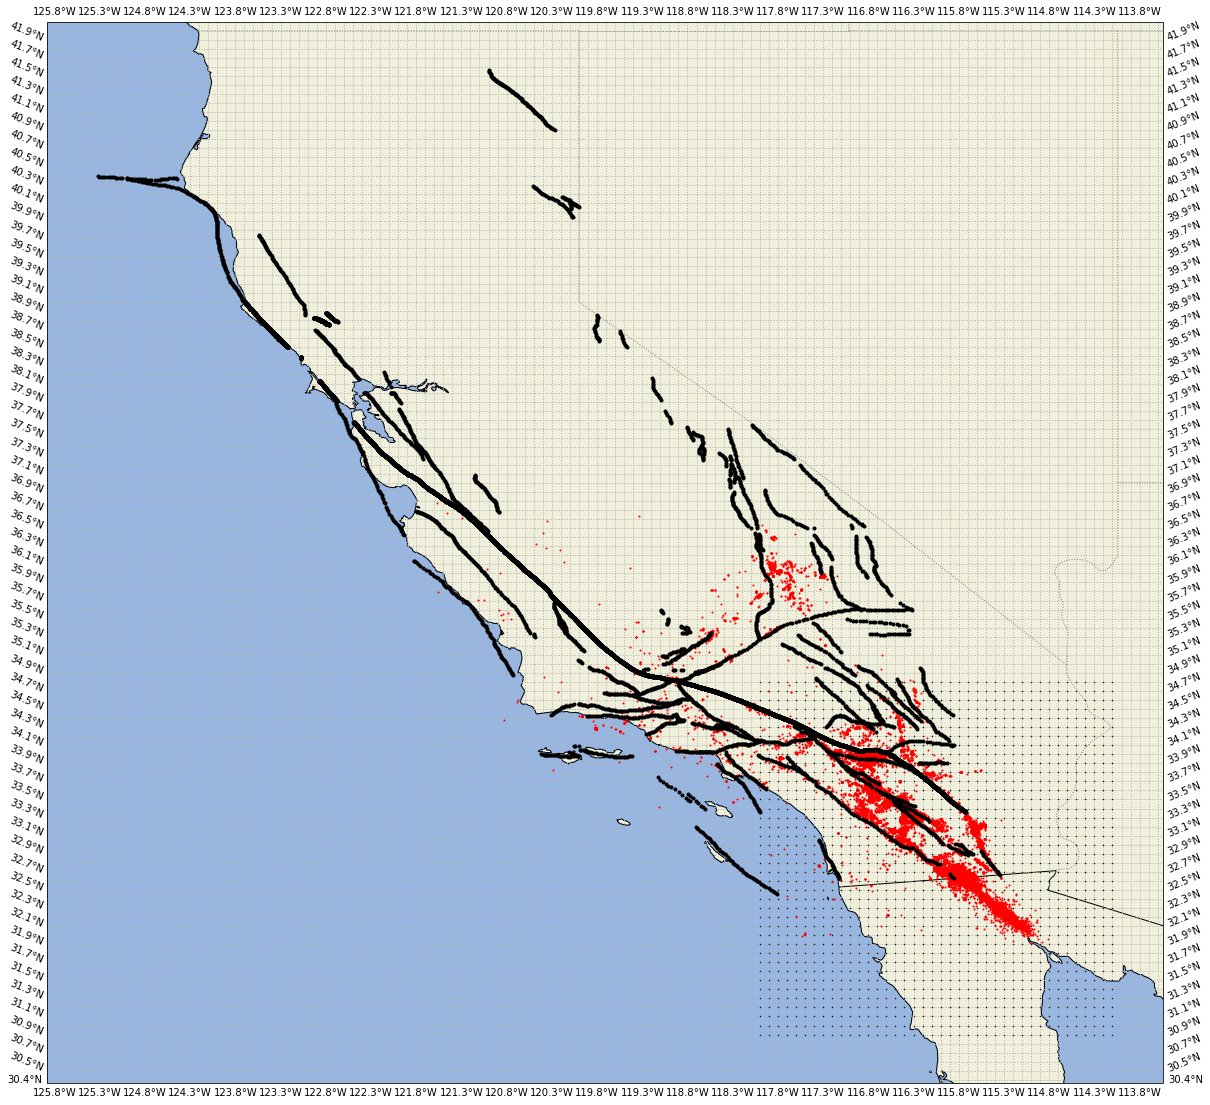

In [121]:
%%time
# Mapping: 60 days density grid

#proj = ccrs.Mercator(min_latitude = MeanLat-2, 
#                     max_latitude = MeanLat+2, globe = None )
proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
#ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
g1=ax.gridlines(crs = ccrs.PlateCarree(), linewidth = 1, linestyle = "dotted", draw_labels = True)
# Added latitude, longitude grid lines
g1.ylocator = mticker.FixedLocator(np.arange(-90,91,0.1))
g1.xlocator = mticker.FixedLocator(np.arange(-180,181,0.1))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
# ***GRIDLINES AND LABELS BLOCK***

# Plot gridpoints
ax.plot(GridPoints["LONGITUDE"].values, GridPoints["LATITUDE"].values,
       transform = ccrs.Geodetic(), marker = ".", color = "black",
       markersize = 1, linestyle = "None");

# 60 days data
ax.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 2, linestyle = "None");

# Plot fault traces! For loop through each fault
for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot


plt.savefig("Maps/Density Grid/EQMap_Full_PlateCarree_Density2.png", facecolor = "white");

## Lambert Conformal Density Grid Test
### (expect distortion)

Note: Lambert Conformal projections take ~2mins to run the first time.

Wall time: 2.77 s


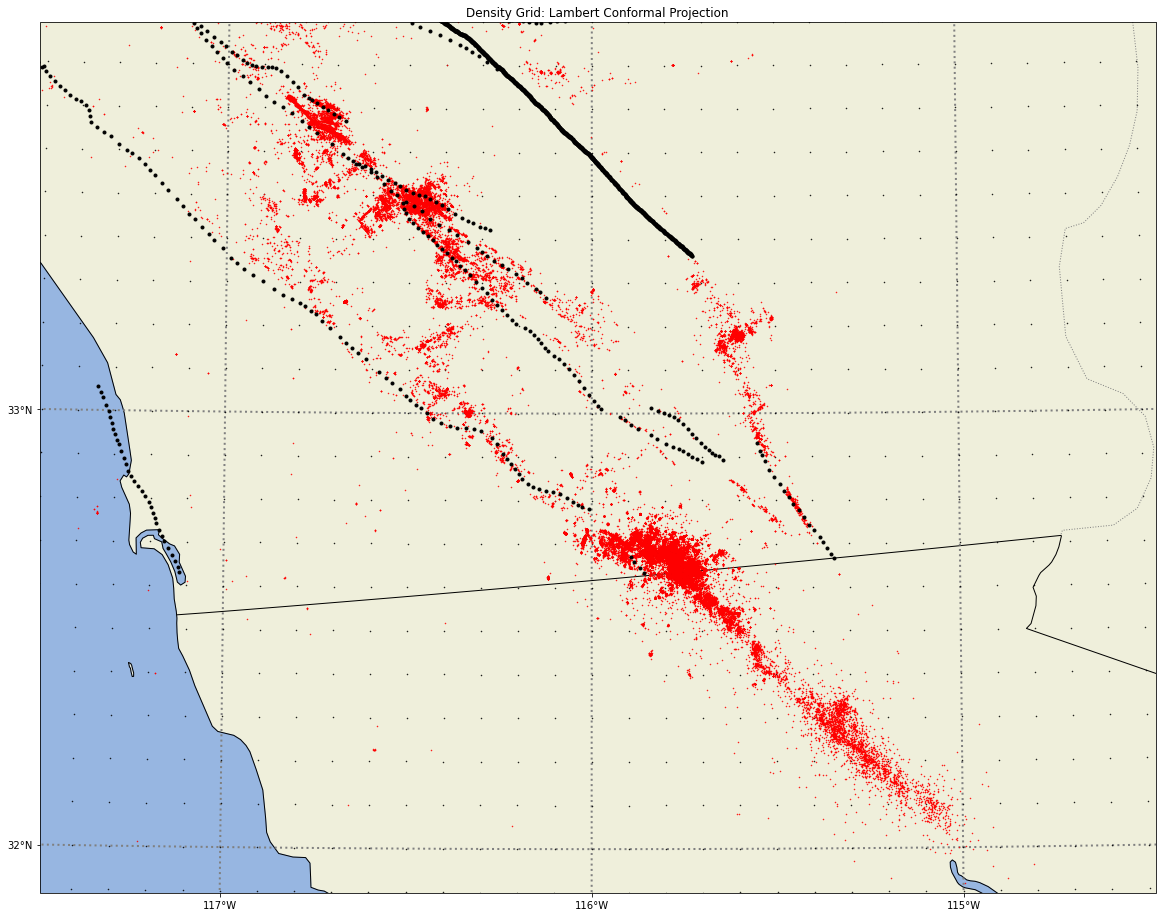

In [122]:
%%time
# Mapping: 60 days density grid

proj = ccrs.LambertConformal(central_longitude = MeanLon, central_latitude = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([MeanLon - 1.5, MeanLon + 1.5, MeanLat - 1, MeanLat + 1], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
# Added latitude, longitude grid lines
fig.canvas.draw()
xticks=list(range(-180, 180, 1))
yticks=list(range(0, 90, 1))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
# ***GRIDLINES AND LABELS BLOCK***

plt.title("Density Grid: Lambert Conformal Projection")

# Plot density gridpoints
ax.plot(GridPoints["LONGITUDE"].values, GridPoints["LATITUDE"].values,
       transform = ccrs.Geodetic(), marker = ".", color = "black",
       markersize = 1, linestyle = "None");

# Plot EQ data
ax.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 1, linestyle = "None");

# Plot fault traces
for i in range(len(FaultsIndices) - 1): 
    # need -1 because start at 0; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot

plt.savefig("Maps/Density Grid/EQMap_Full_LambertConf_Density.png", facecolor = "white");

## Event Density Plot: Full 60 Days

In [123]:
# Define ["DISTANCE"]
GridPoints["DISTANCE_FULL"] = 0
GridPoints.head()
#GridPoints["LONGITUDE"][5]

,LATITUDE,LONGITUDE,DISTANCE_FULL
0,30.9,-118.0,0
1,30.9,-117.9,0
2,30.9,-117.8,0
3,30.9,-117.7,0
4,30.9,-117.6,0


In [124]:
%%time
# Assign distances to each gridpoint
for i in range(len(GridPoints)): # step through each of 1600 points
    TempDists_Deg = gd.locations2degrees(GridPoints["LATITUDE"][i], GridPoints["LONGITUDE"][i],
                                        QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
    TempDists_DF = pd.DataFrame(data = TempDists_Deg, columns = ["DISTANCE"])
    TempDists_DF = TempDists_DF.loc[TempDists_DF["DISTANCE"] <= 0.1] # within 0.1 degrees
    GridPoints["DISTANCE_FULL"][i] = (len(TempDists_DF)/60) 
    # Each point now has (# events within certain distance defined/60 days)

Wall time: 44.6 s


In [125]:
GridPoints.DISTANCE_FULL.describe()

count    1600.000000
mean        5.172500
std        58.099279
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1326.000000
Name: DISTANCE_FULL, dtype: float64

Wall time: 1.33 s


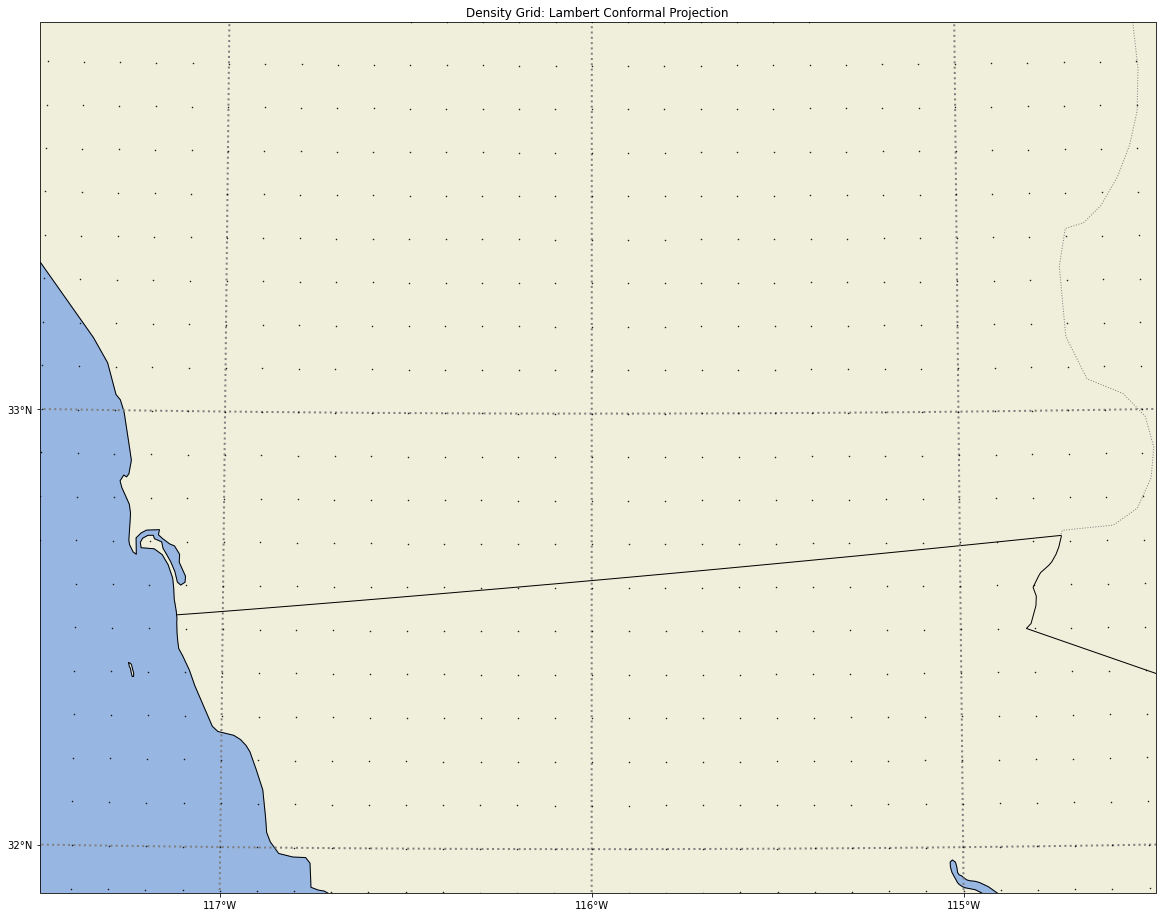

In [126]:
%%time
# Mapping: 60 days density grid

proj = ccrs.LambertConformal(central_longitude = MeanLon, central_latitude = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([MeanLon - 1.5, MeanLon + 1.5, MeanLat - 1, MeanLat + 1], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
# Added latitude, longitude grid lines
fig.canvas.draw()
xticks=list(range(-180, 180, 1))
yticks=list(range(0, 90, 1))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
# ***GRIDLINES AND LABELS BLOCK***

plt.title("Density Grid: Lambert Conformal Projection")

# Plot density gridpoints
ax.plot(GridPoints["LONGITUDE"].values, GridPoints["LATITUDE"].values,
       transform = ccrs.Geodetic(), marker = ".", color = "black",
       markersize = 1, linestyle = "None");

plt.savefig("Maps/Density Grid/EQMap_Full_LambertConf_EventDensityPlot.png", facecolor = "white");